In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8"
table = pd.read_html(url, match='Коефіцієнт народжуваності в регіонах України', thousands=".", decimal=",")
df = pd.DataFrame(table[0])

In [3]:
## 1. Display the first rows of the table using the head method

In [4]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,—,—
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,—


In [5]:
## 2. Determine the number of rows and columns in the dataframe (shape attribute)

In [6]:
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 28
Number of columns: 9


In [7]:
## 3. Replace the '—' values in the table with NaN values.

In [8]:
df.replace("—", np.nan, inplace=True)

In [9]:
## 4. Determine the types of all columns using dataframe.dtypespd.DataFrame(table[0].dtypes)

In [10]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [11]:
## 5. Change the types of non-numeric columns to numeric. Hint - these are the columns where the '—' symbol was located.

In [12]:
df.astype({'2014': float, '2019': float})
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object

In [13]:
## 6. Calculate the proportion of missing values in each column (use the isnull and sum methods).

In [14]:
calculate_null = df.isnull().sum()
print("\nNull values in column after sum\n", calculate_null)


Null values in column after sum
 Регіон    0
1950      2
1960      1
1970      1
1990      0
2000      0
2012      0
2014      2
2019      4
dtype: int64


In [15]:
## 7. Delete the data for the entire country from the table, the last row of the table.
df.drop(df.index[-1], inplace=True)
print("Result\n", df)

Result
                Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Мик

In [16]:
## 8. Replace missing data in columns with the average values of these columns (using the fillna method).
df.drop('Регіон', axis=1).mean(numeric_only=True).round(0)
df.fillna(_, inplace=True)
df

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,23.0,20.6,16.0,13.0,7.3,12.6,object,object
1,Вінницька,22.4,19.2,14.2,12.4,8.4,11.2,10.9,7.6
2,Волинська,24.7,25.0,17.9,15.3,11.2,14.8,14.1,10.1
3,Дніпропетровська,20.4,20.4,15.1,12.3,7.1,11.2,11.1,7.1
4,Донецька,27.1,21.4,14.0,10.9,6.1,9.8,8.2,object
5,Житомирська,26.1,22.3,15.9,12.9,8.9,12.2,12.0,7.9
6,Закарпатська,31.4,27.3,20.7,16.8,11.5,15.1,14.6,10.4
7,Запорізька,21.9,19.7,15.0,12.4,7.1,10.6,10.6,6.8
8,Івано-Франківська,24.3,24.8,18.2,15.5,10.3,12.4,12.2,8.8
9,Київська,20.4,18.9,15.6,12.3,7.3,12.2,12.1,8.0


In [17]:
## 9. Get a list of regions where the birth rate in 2019 was higher than the average in Ukraine.
df['2019'] = pd.to_numeric(df['2019'], errors='coerce')
higher_birth_rate = df['2019'] > df['2019'].mean(numeric_only=True)
df[higher_birth_rate]['Регіон'].tolist()

['Волинська',
 'Закарпатська',
 'Івано-Франківська',
 'Львівська',
 'Одеська',
 'Рівненська',
 'Херсонська',
 'Чернівецька',
 'Київ']

In [18]:
## 10. Which region had the highest birth rate in 2014?
df['2014'] = pd.to_numeric(df['2014'], errors='coerce')
region_with_highest_birth_rate_2014 = df.loc[df['2014'].idxmax(), 'Регіон']
print("Region with the highest birth rate in 2014:", region_with_highest_birth_rate_2014)


Region with the highest birth rate in 2014: Рівненська


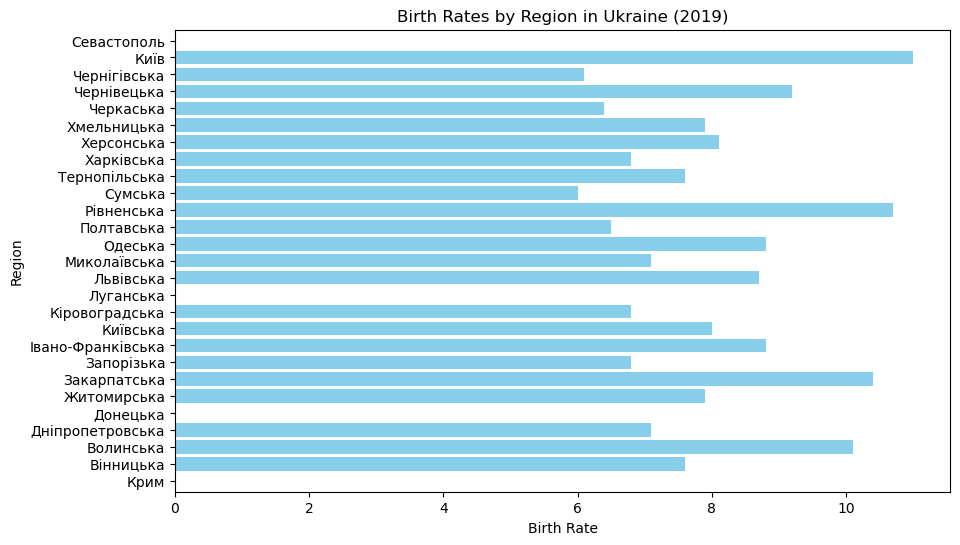

In [19]:
## 11.  Create a bar chart of birth rates by region for the year 2019
plt.figure(figsize=(10, 6))
plt.barh(df['Регіон'], df['2019'], color='skyblue')
plt.xlabel('Birth Rate')
plt.ylabel('Region')
plt.title('Birth Rates by Region in Ukraine (2019)')
plt.show()

___Visualization___

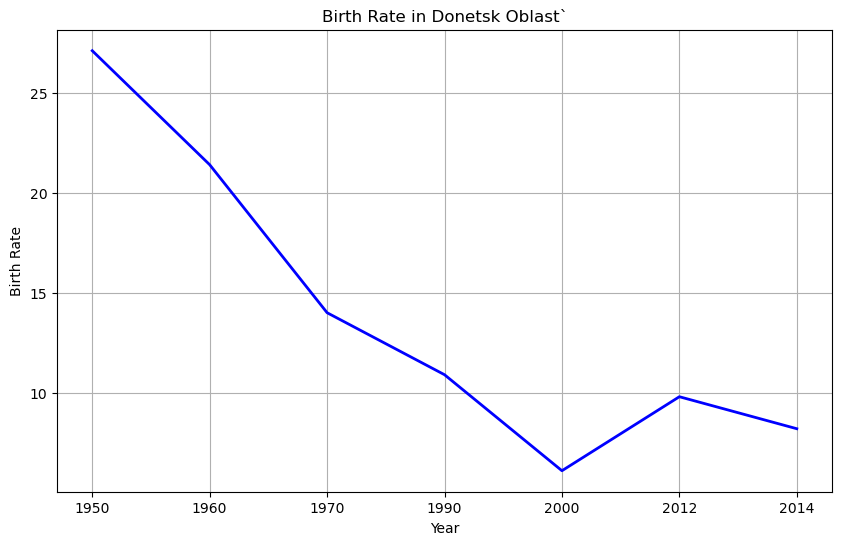

In [20]:
# Creating a line plot

region_data = df[df['Регіон'] == 'Донецька'].iloc[0, 1:]
years = df.columns[1:]

plt.figure(figsize=(10, 6))
plt.plot(years, region_data, color='blue', linestyle='-', linewidth=2)
plt.title('Birth Rate in Donetsk Oblast`')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.grid(True)
plt.show()

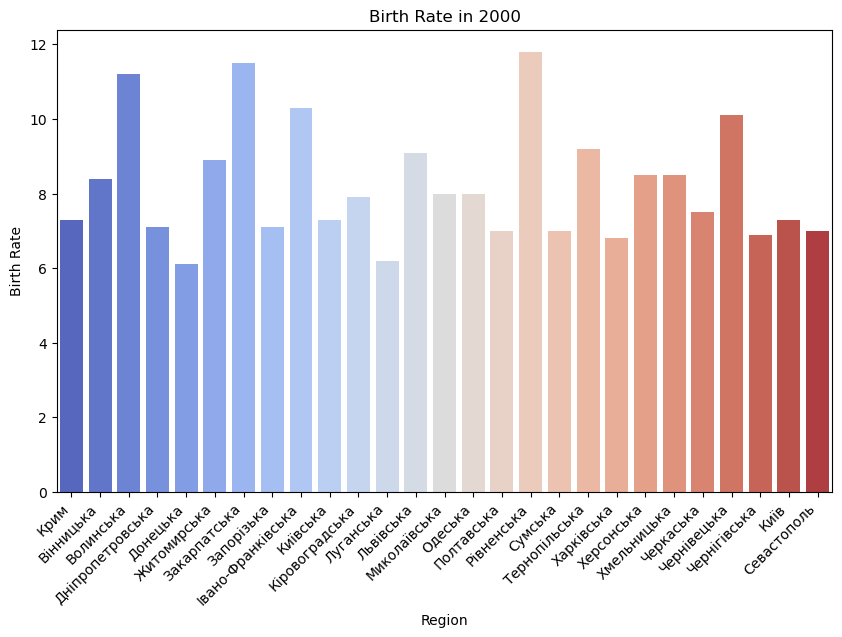

In [21]:
# Creating Bar plot

x = df['Регіон']
y = df['2000']

plt.figure(figsize=(10, 6))
sns.barplot(x=x, y=y, palette='coolwarm')
plt.title('Birth Rate in 2000')
plt.xlabel('Region')
plt.ylabel('Birth Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

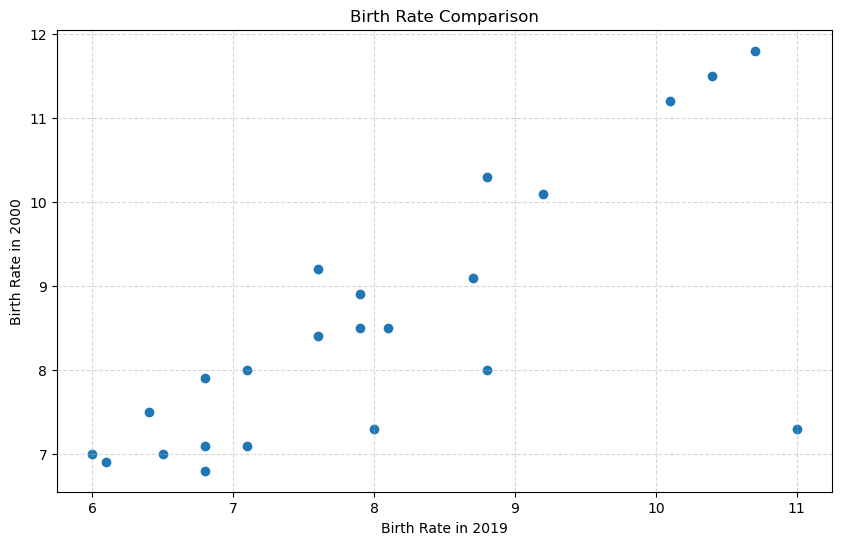

In [22]:
# Scatter Plot

x = df['2019']
y = df['2000']

plt.figure(figsize=(10, 6))
plt.scatter(x=x, y=y)
plt.title('Birth Rate Comparison')
plt.xlabel('Birth Rate in 2019')
plt.ylabel('Birth Rate in 2000')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Text(0.5, 1.0, 'Proportion of Birth Rates by Region in 2012')

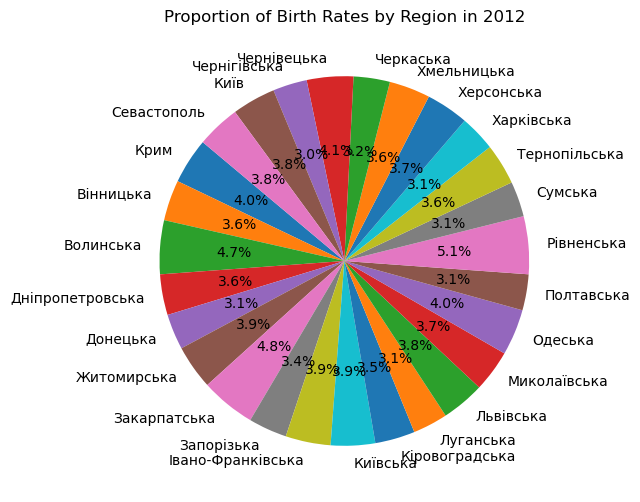

In [23]:
# Pie chart

x = df['2012']
y = df['Регіон']

plt.figure(figsize=(10, 6))
plt.pie(x=x, labels=y, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Birth Rates by Region in 2012')